In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdChemReactions


In [ ]:
 patts = (
        ("[n+;H]", "n"), # Imidazoles
        ("[N+;!H0]", "N"), # Amines
        ("[$([O-]);!$([O-][#7])]", "O"), # Carboxylic acids and alcohols
        ("[S-;X1]", "S"), # Thiols
        ("[$([N-;X2]S(=O)=O)]", "N"), # Sulfonamides
        ("[$([N-;X2][C,N]=C)]", "N"), # Enamines
        ("[n-]", "[nH]"), # Tetrazoles
        ("[$([S-]=O)]", "S"), # Sulfoxides
        ("[$([N-]C=O)]", "N"), # Amides
    )

    reactions = [
        (AllChem.MolFromSmarts(x), AllChem.MolFromSmiles(y, False)) for x,y in patts
    ]

    for (reactant, product) in reactions:
        while mol.HasSubstructMatch(reactant):
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]


In [2]:
start_mol = Chem.MolFromSmiles('c1cc(CCCO)ccc1')

mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                 Chem.MolFromSmiles('CO'), 
                                 Chem.MolFromSmiles('C(=O)O'),
                                 replaceAll=True)

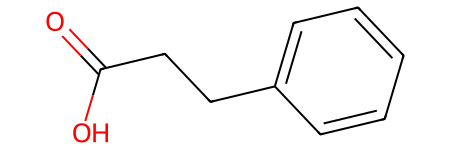

In [4]:
mod_mol[0]

In [5]:
for atom in mod_mol[0].GetAtoms():
    prop_dict = atom.GetPropsAsDict()
    print(prop_dict)

{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa975a5c0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa975a5c0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa975a5c0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa975a5c0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa975a5c0>}
{'__computedProps': <rdkit.rdBase._vectSs object at 0x7f5fa9759bc0>}


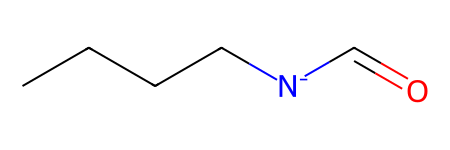

In [7]:
start_mol = Chem.MolFromSmiles('CCCC[N-]C=O')

start_mol

In [11]:
from_, to_ = ("[$([N-]C=O)]", "N") # Amides

mod_mol = AllChem.ReplaceSubstructs(start_mol, 
                                 Chem.MolFromSmarts(from_), 
                                 Chem.MolFromSmiles(to_),
)

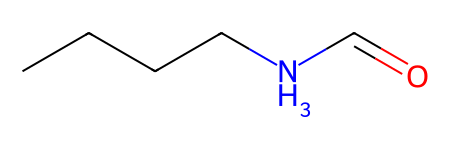

In [13]:
mod_mol[0]


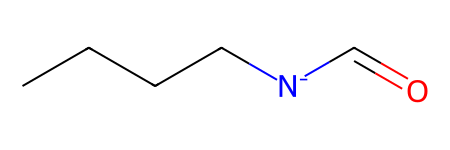

In [17]:
start_mol = Chem.MolFromSmiles('CCCC[N-]C=O')
rxn = "[$([N-]C=O):1]>>[N:1]"
rxn = rdChemReactions.ReactionFromSmarts(rxn)
rxn.RunReactantInPlace(start_mol)
start_mol


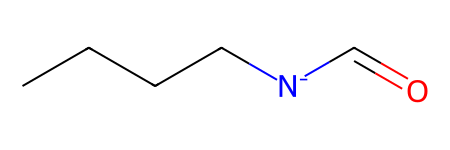

In [32]:
start_mol = Chem.MolFromSmiles('CCCC[N-]C=O')
rxn = "[N-:1]>>[N&0:1]"
rxn = rdChemReactions.ReactionFromSmarts(rxn)
rxn.RunReactantInPlace(start_mol)
start_mol

In [ ]:
from copy import deepcopy
def neutralize_atoms(mol):
    mol = deepcopy(mol)
    pattern = Chem.MolFromSmarts("[+1!h0!$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

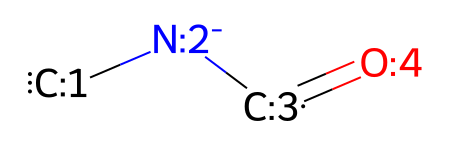

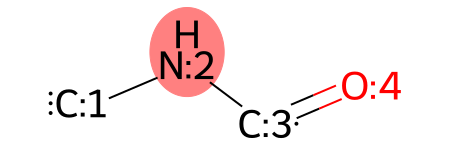

In [36]:
start_mol = Chem.MolFromSmiles('[C:1][N-:2][C:3]=[O:4]')
display(start_mol)
neutralize_atoms(start_mol)

In [38]:
Chem.MolToSmiles(start_mol)

'[C:1][NH:2][C:3]=[O:4]'